In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file_path='../../Consolidated_Data/SMS3/SMS3_chrageMix_and_grade.csv'

In [3]:
df=pd.read_csv(file_path)

In [4]:
df.set_index(df.columns[0],drop=True,inplace=True)

# Top 5 grades

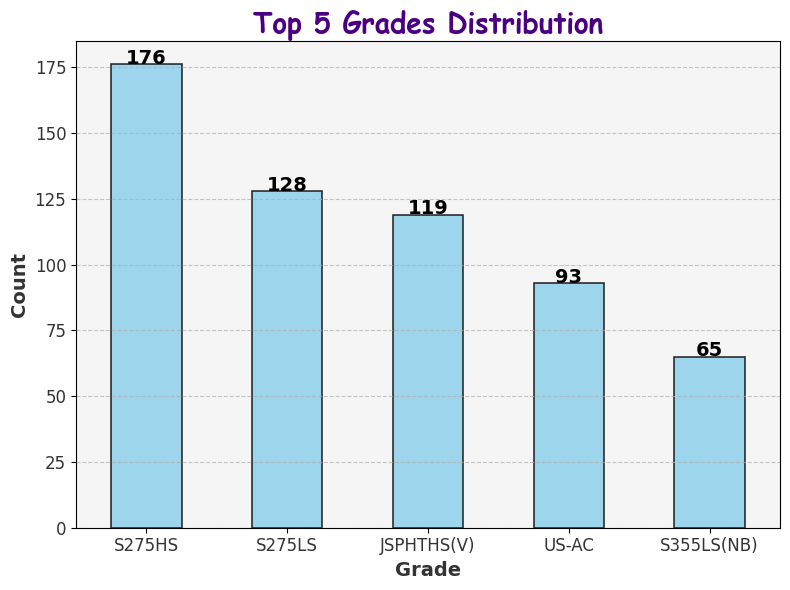

In [26]:


top_5_grades = df['GRADE'].value_counts()[:5]

plt.figure(figsize=(8, 6))

bars = top_5_grades.plot(kind='bar', color='skyblue', edgecolor='black', linewidth=1.2)

plt.title('Top 5 Grades Distribution', fontsize=20, color='#4B0082', fontweight='bold', fontname='Comic Sans MS')
plt.xlabel('Grade', fontsize=14, color='#333333', fontweight='bold')
plt.ylabel('Count', fontsize=14, color='#333333', fontweight='bold')

plt.xticks(rotation=0, fontsize=12, color='#333333')
plt.yticks(fontsize=12, color='#333333')

plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(top_5_grades):
    plt.text(i, v + 0.1, str(v), ha='center', fontsize=14, color='black', fontweight='bold')

plt.gca().set_facecolor('#f5f5f5')

for bar in bars.patches:
    bar.set_alpha(0.8)
    bar.set_edgecolor('black')
    bar.set_linewidth(1.2)

plt.tight_layout()

plt.show()


## Note
1. TC does not contain dolo,lime and coke (fluxes)
2. TC only contains charges like H.M, DRI, Bucket
3. CPC is the ammount of coke in kgs, rest are in ton

In [7]:
# convering coke(CPC) to tons from kg

df['CPC']=df['CPC']/1000

In [8]:
data=df.copy()

In [9]:
df=df[['Bucket','HM', 'DRI','LIME', 'DOLO','CPC','OXY','POWER','AT','POT','GRADE']]

In [10]:
df=df.dropna()

In [11]:
df['Total_weight']=df[['Bucket','HM', 'DRI','LIME', 'DOLO','CPC']].sum(axis=1)

In [12]:
df=df[df['Total_weight']<200]

In [14]:
df['type'] = np.where(df['Bucket'] > 5, 'WB', 'WOB')

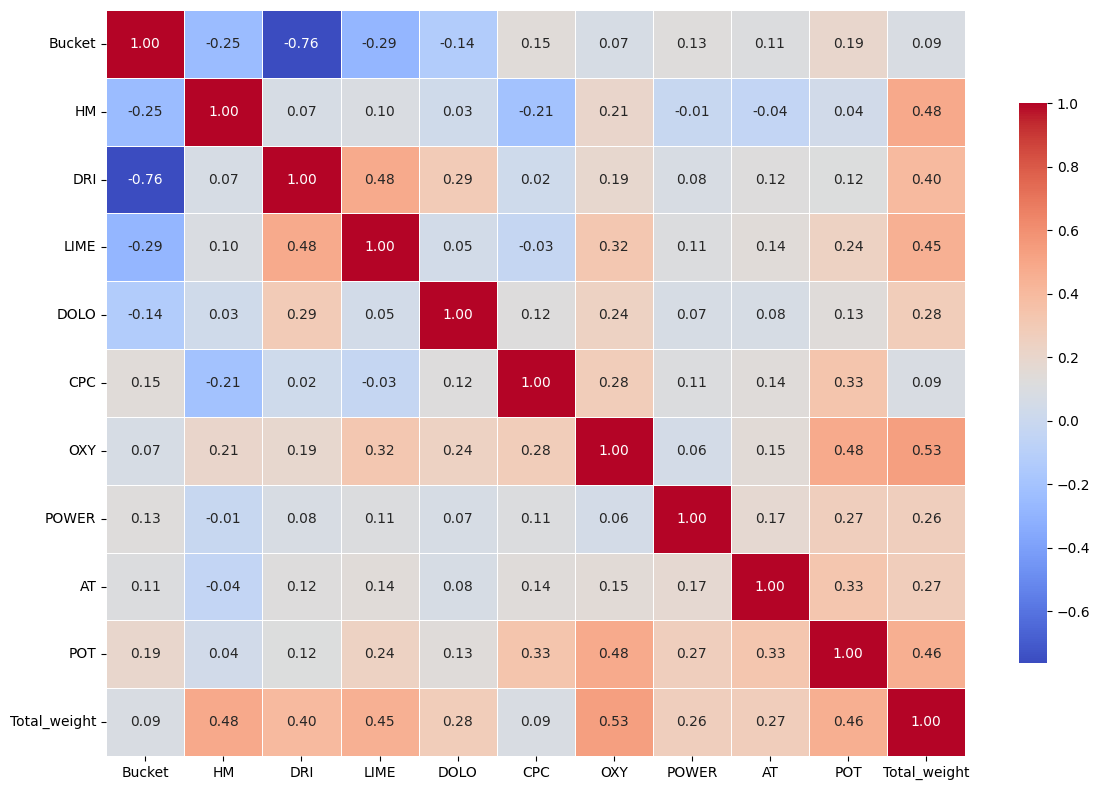

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(['GRADE','type'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='white')
plt.tight_layout()
plt.show()

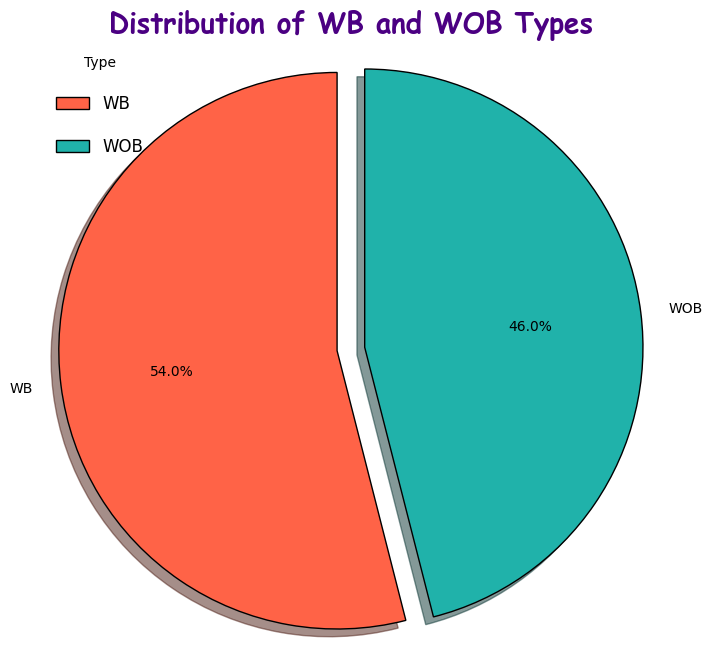

In [18]:
type_counts = df['type'].value_counts()

colors = ['#FF6347', '#20B2AA']

explode = (0.1, 0)

plt.figure(figsize=(8, 8))
plt.pie(type_counts, 
        labels=type_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=colors,
        explode=explode, 
        shadow=True,      
        wedgeprops={'edgecolor': 'black', 'linewidth': 1, 'linestyle': 'solid'})

plt.title('Distribution of WB and WOB Types', 
          fontsize=20, 
          color='#4B0082',  
          fontweight='bold', 
          fontname='Comic Sans MS')

plt.legend(type_counts.index, 
           title="Type", 
           loc="upper left", 
           fontsize=12, 
           frameon=False, 
           labelspacing=1.5, 
           markerscale=1.5, 
           shadow=True)

plt.gca().set_facecolor('#f5f5f5')

plt.axis('equal')
plt.show()

In [20]:
wb=df[df['type']=='WB'].drop('type',axis=1)
wob=df[df['type']=='WOB'].drop('type',axis=1)

In [35]:
df=df[df['POWER']<46241]
df=df[df['AT']<100]

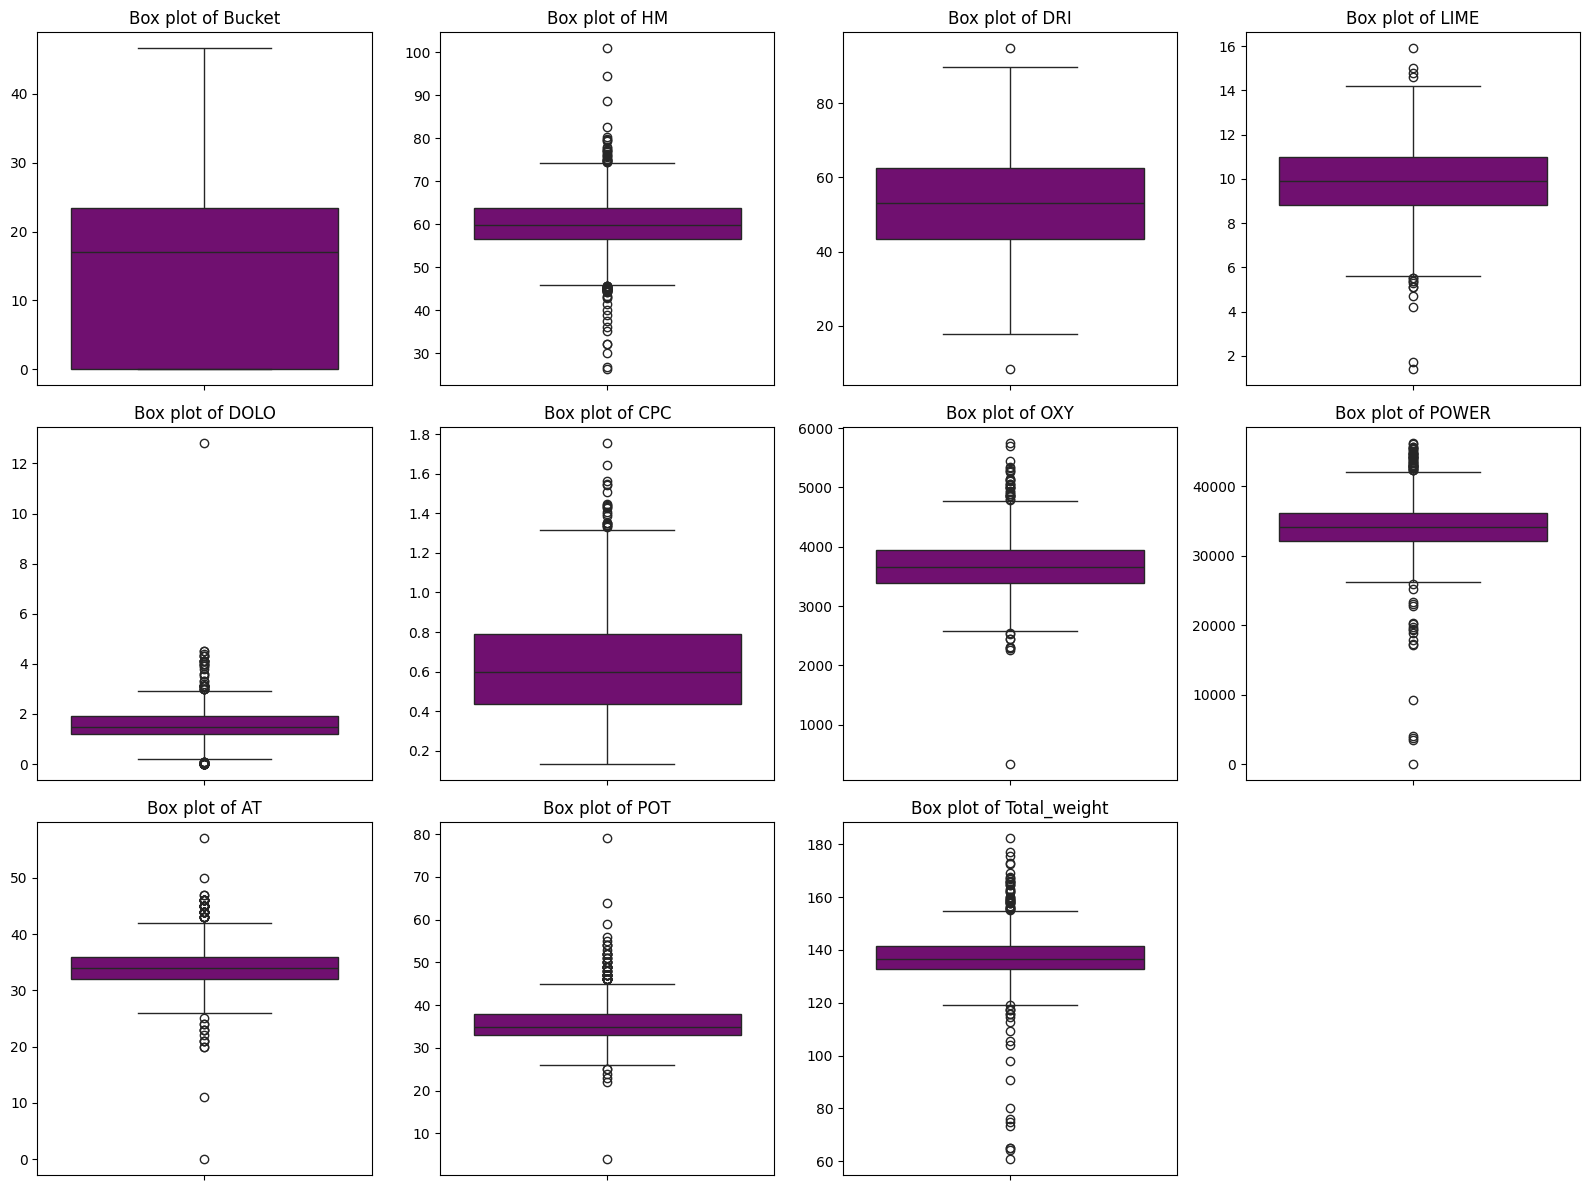

In [39]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):  # Only numeric columns
    plt.subplot(3, 4, i)
    sns.boxplot(df[col], color='purple')
    plt.title(f'Box plot of {col}')
    plt.xlabel('') 
    plt.ylabel('')  
plt.tight_layout()
plt.show()

ValueError: num must be an integer with 1 <= num <= 12, not 13

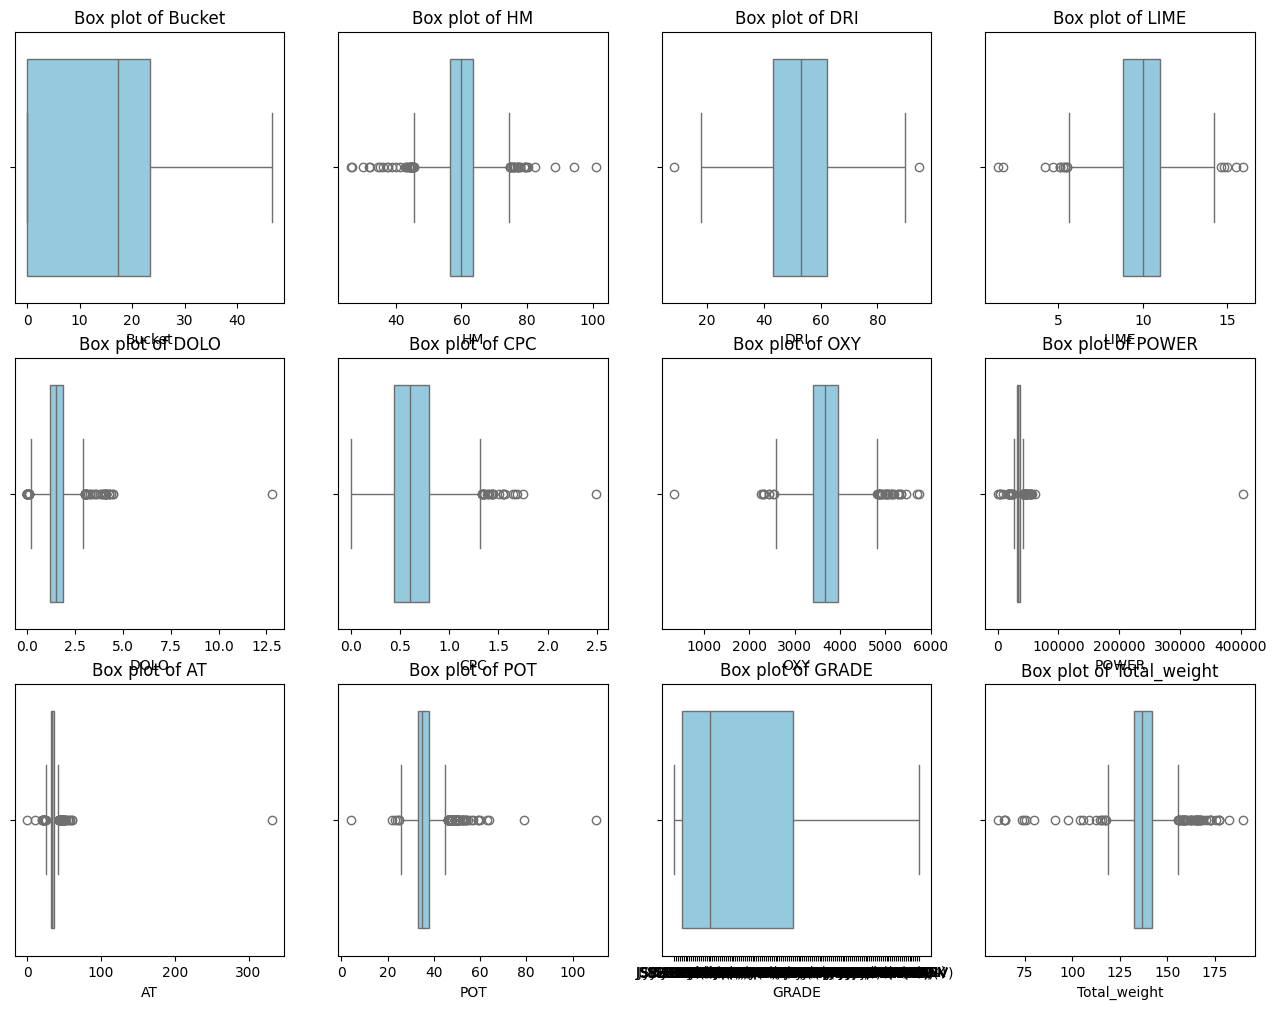

In [27]:
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.show()

# KDE plots for all columns
plt.figure(figsize=(16, 12))
for i, col in enumerate(df.select_dtypes(include=['number']).columns, 1):  # Only numeric columns
    plt.subplot(3, 4, i)
    sns.kdeplot(df[col], shade=True, color='purple')
    plt.title(f'KDE plot of {col}')
    plt.xlabel('') 
    plt.ylabel('')  
plt.tight_layout()
plt.show()

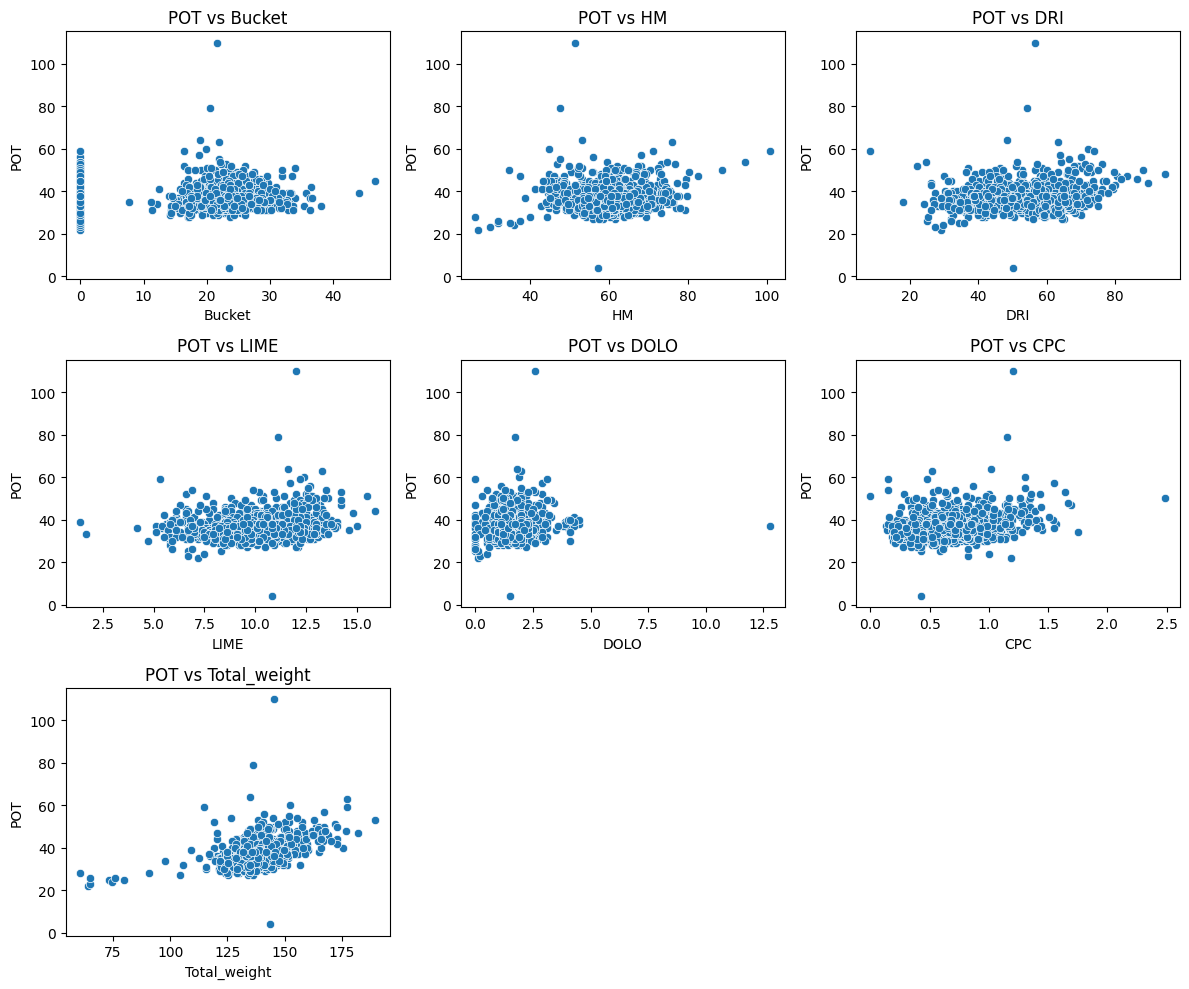

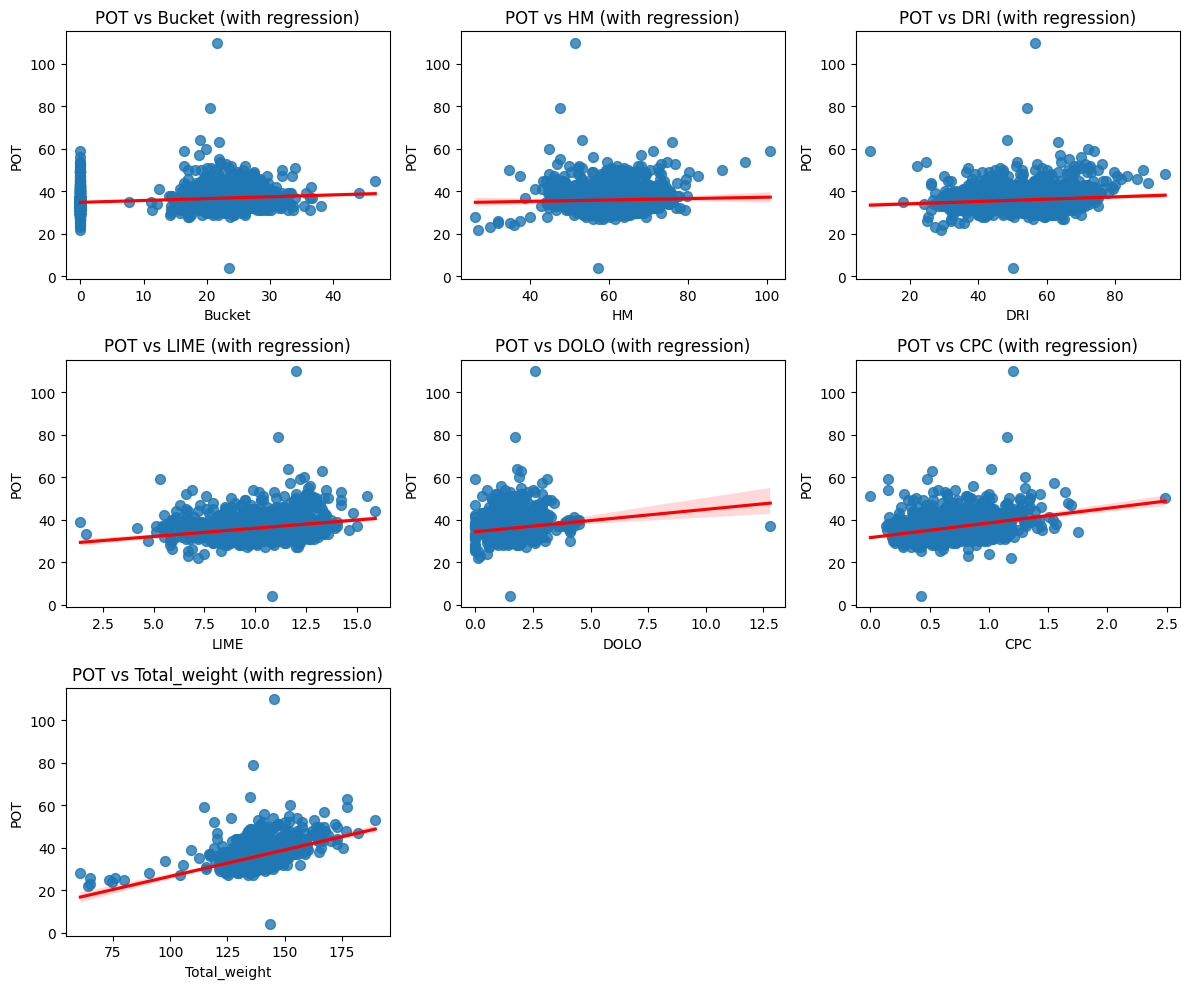

In [ ]:
columns = ['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC', 'Total_weight']

# Scatter plots for POT vs each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=df[col], y=df['POT'])
    plt.title(f'POT vs {col}')
plt.tight_layout()
plt.show()

# Additional plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=df[col], y=df['POT'], scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'POT vs {col} (with regression)')
plt.tight_layout()
plt.show()

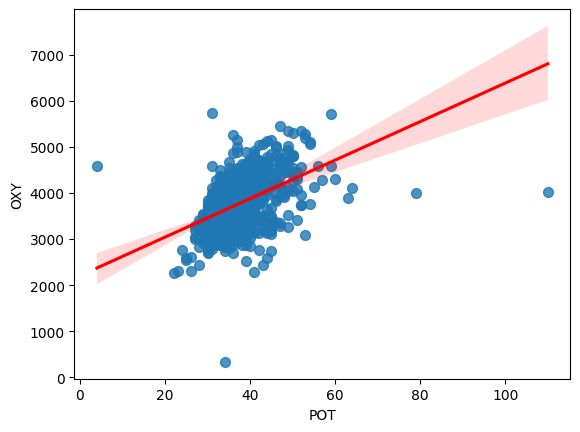

In [ ]:
sns.regplot(y=df['OXY'], x=df['POT'], scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.show()

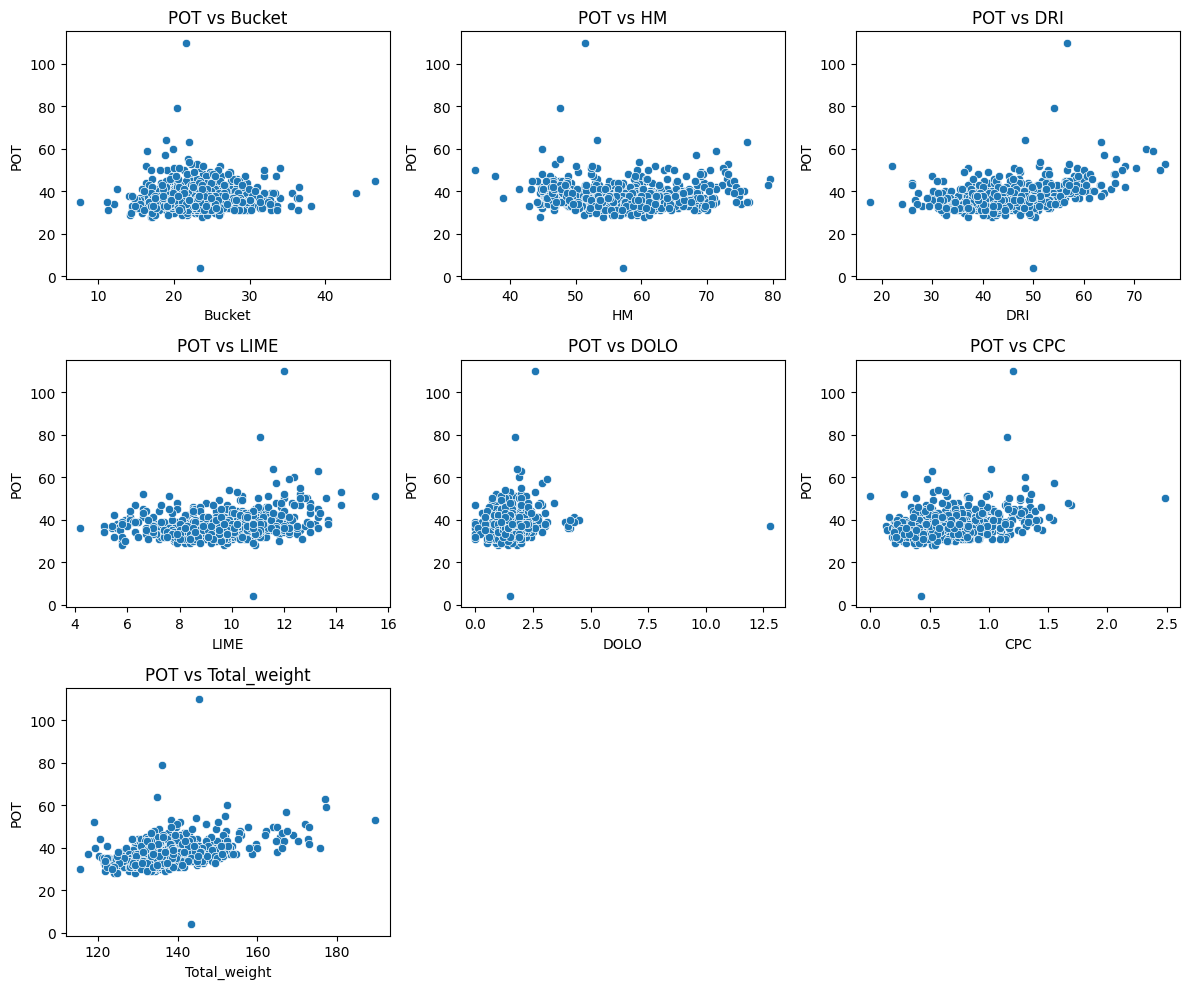

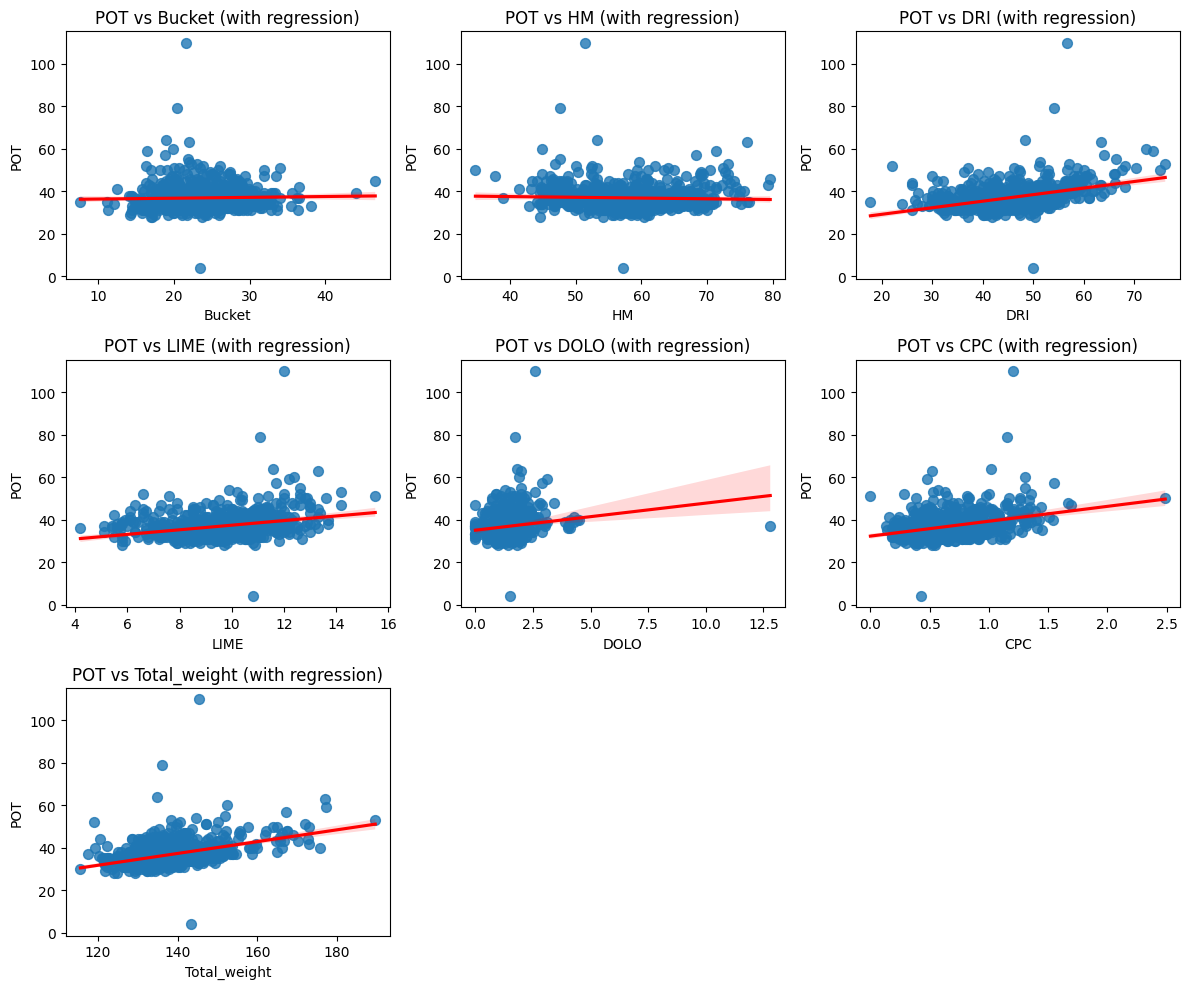

In [21]:
columns = ['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC', 'Total_weight']

# Scatter plots for POT vs each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=wb[col], y=wb['POT'])
    plt.title(f'POT vs {col}')
plt.tight_layout()
plt.show()

# Additional plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=wb[col], y=wb['POT'], scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'POT vs {col} (with regression)')
plt.tight_layout()
plt.show()

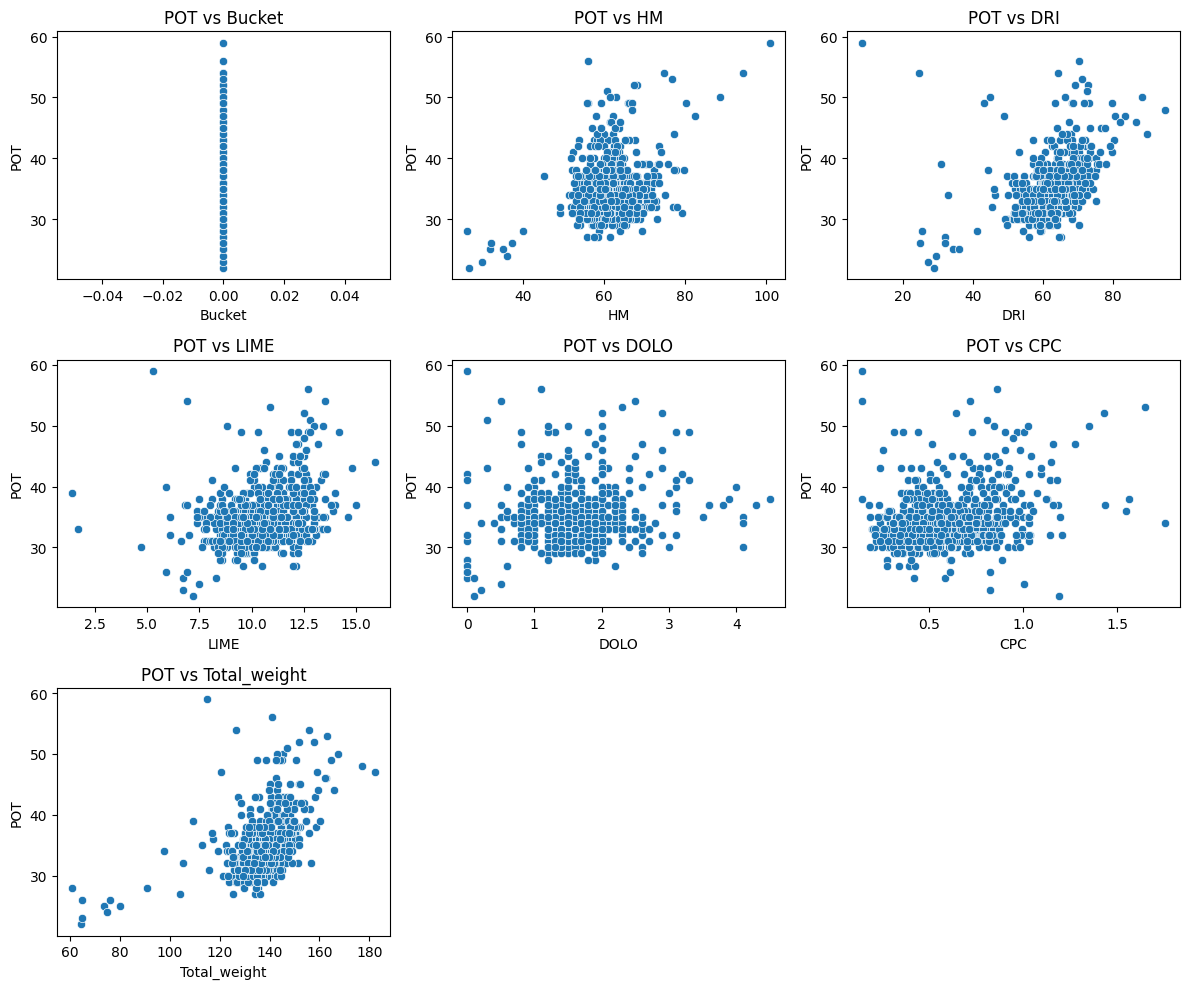

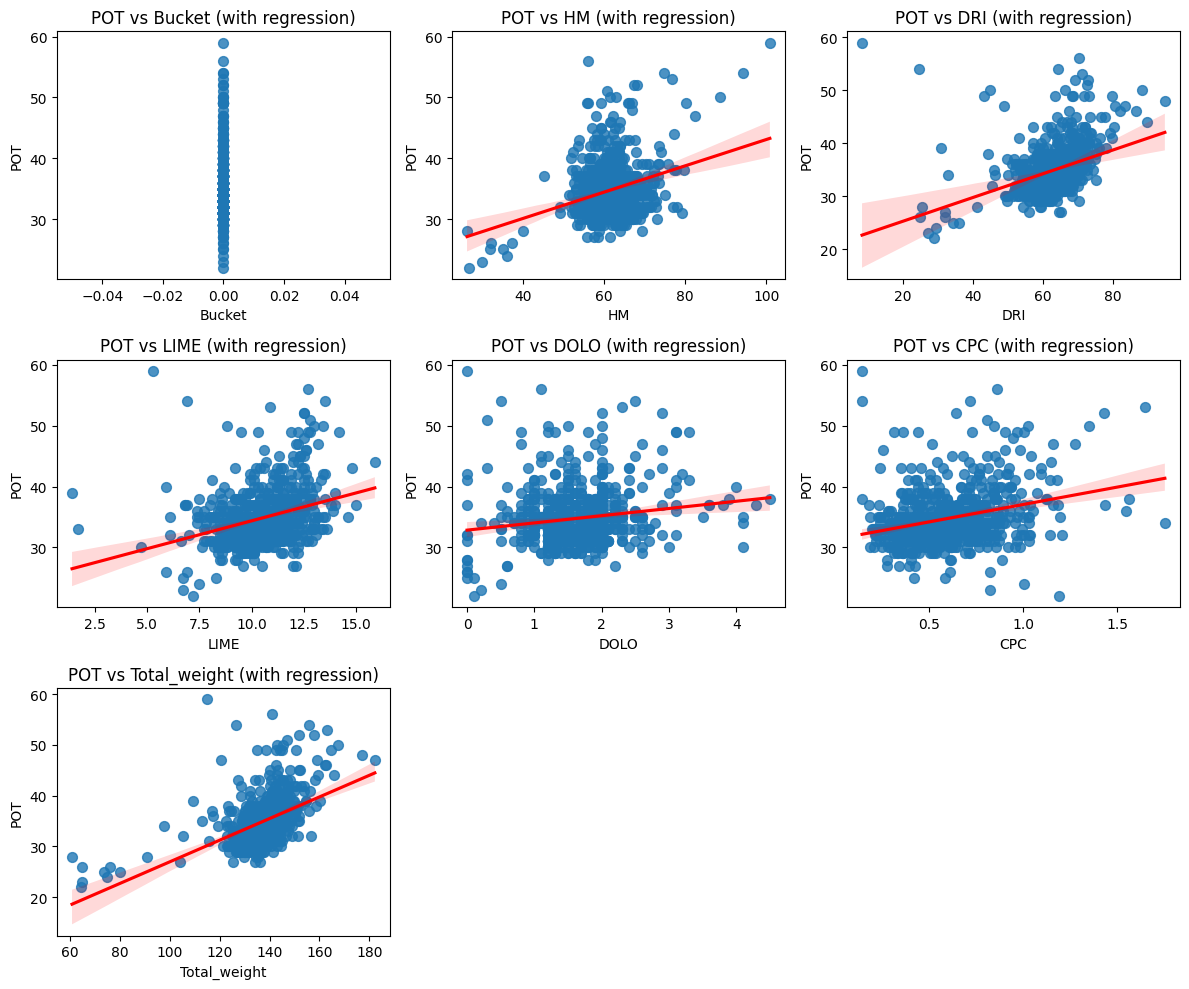

In [22]:
columns = ['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC', 'Total_weight']

# Scatter plots for POT vs each column
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=wob[col], y=wob['POT'])
    plt.title(f'POT vs {col}')
plt.tight_layout()
plt.show()

# Additional plots
plt.figure(figsize=(12, 10))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=wob[col], y=wob['POT'], scatter_kws={'s': 50}, line_kws={'color': 'red'})
    plt.title(f'POT vs {col} (with regression)')
plt.tight_layout()
plt.show()

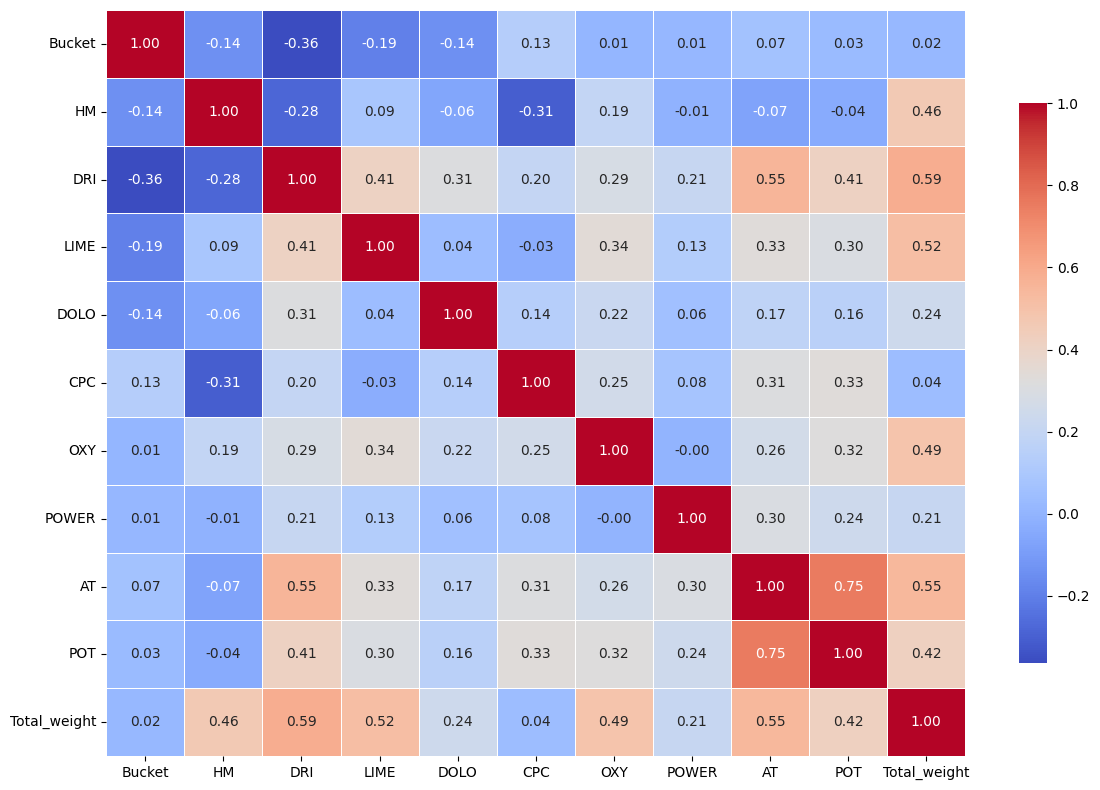

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(wb.drop(['GRADE'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='white')
plt.tight_layout()
plt.show()

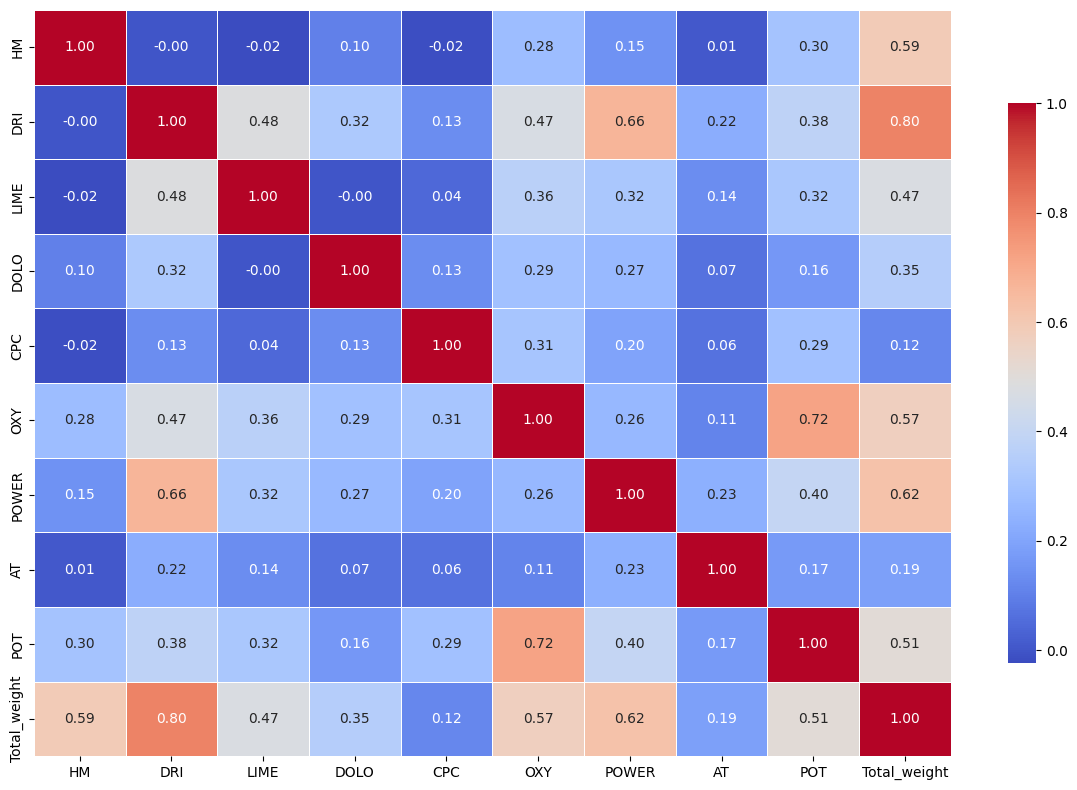

In [46]:
plt.figure(figsize=(12, 8))
sns.heatmap(wob.drop(['GRADE','Bucket'], axis=1).corr(), annot=True, fmt='.2f', cmap='coolwarm', 
            cbar_kws={'shrink': 0.75}, linewidths=0.5, linecolor='white')
plt.tight_layout()
plt.show()

# Trial Model

1. cleaning data

2. scaling using std scaler

2. fitting a huber regression and cheking wights


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import HuberRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt



In [ ]:
# Define X and y
X = df[['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC']]
y = df['POT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = HuberRegressor()
model.fit(X_train_scaled, y_train)

HuberRegressor()

In [ ]:

y_pred = model.predict(X_test_scaled)
y_train_pred = model.predict(X_train_scaled)


mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Train Data Metrics:")
print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Squared Error (Train): {mse_train}")
print(f"R² Score (Train): {r2_train}")

print("\nTest Data Metrics:")
print(f"Mean Absolute Error (Test): {mae_test}")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R² Score (Test): {r2_test}")


Train Data Metrics:
Mean Absolute Error (Train): 2.779186323187505
Mean Squared Error (Train): 21.2505016724744
R² Score (Train): 0.3164090631468012

Test Data Metrics:
Mean Absolute Error (Test): 2.655262571549996
Mean Squared Error (Test): 16.71126364739938
R² Score (Test): 0.25307632493766463


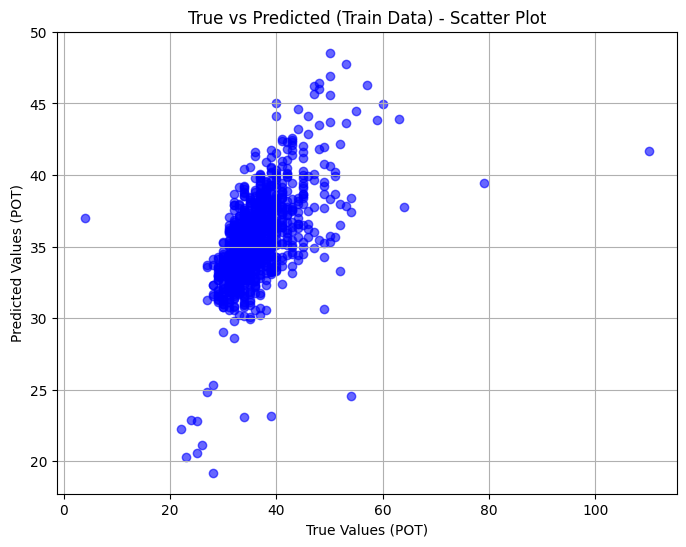

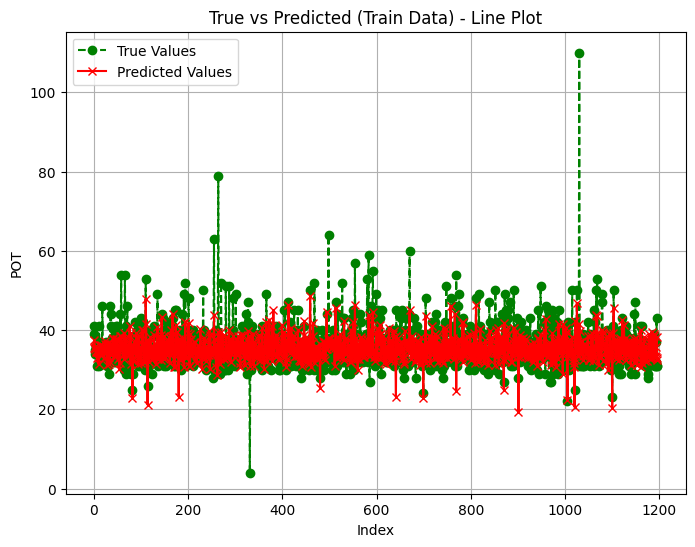

In [ ]:

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Train Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_train.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_train_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Train Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()


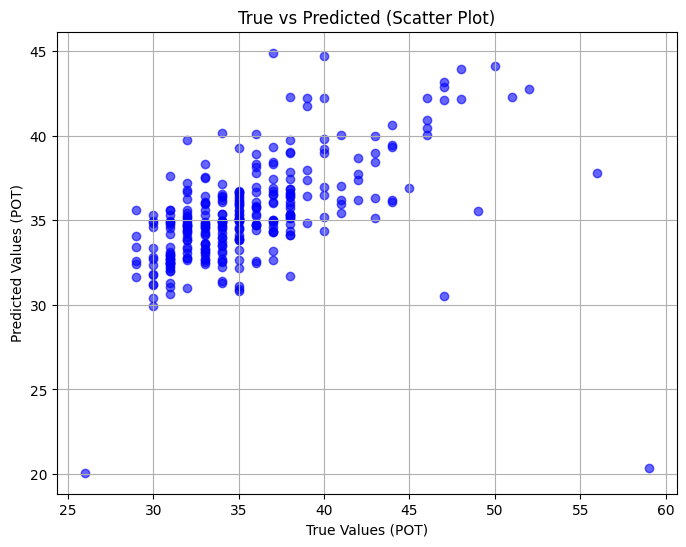

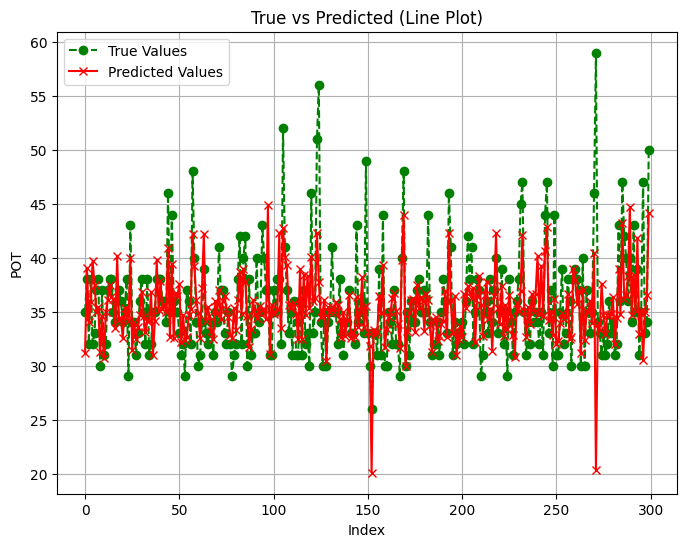

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Scatter Plot)')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Line Plot)')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()


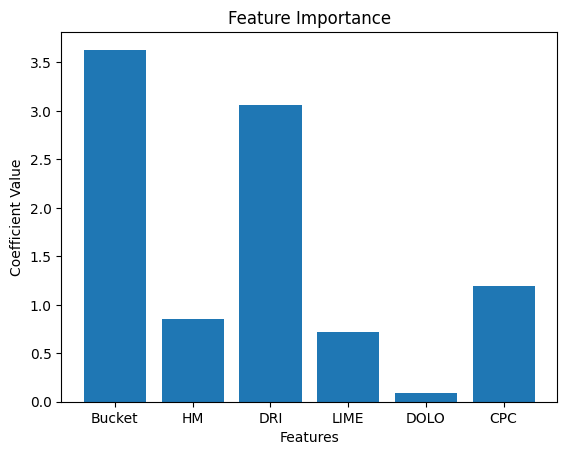

In [ ]:
feature_importance = model.coef_

plt.bar(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.show()

# Using Random Forest

Train Data Metrics:
Mean Absolute Error (Train): 1.0885714285714285
Mean Squared Error (Train): 2.953632414369257
R² Score (Train): 0.9049868854684994

Test Data Metrics:
Mean Absolute Error (Test): 2.7091333333333334
Mean Squared Error (Test): 13.160939333333333
R² Score (Test): 0.41176099057861726


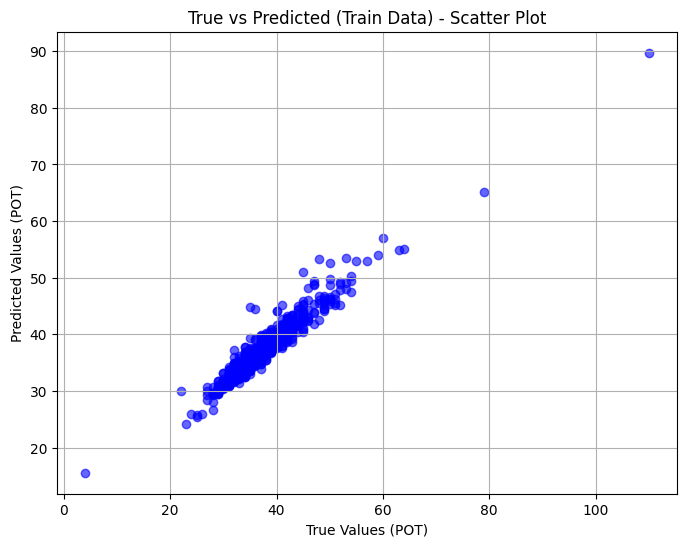

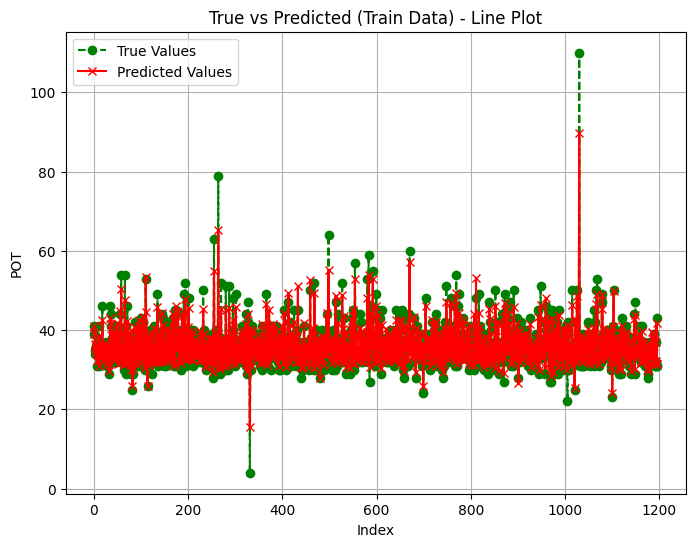

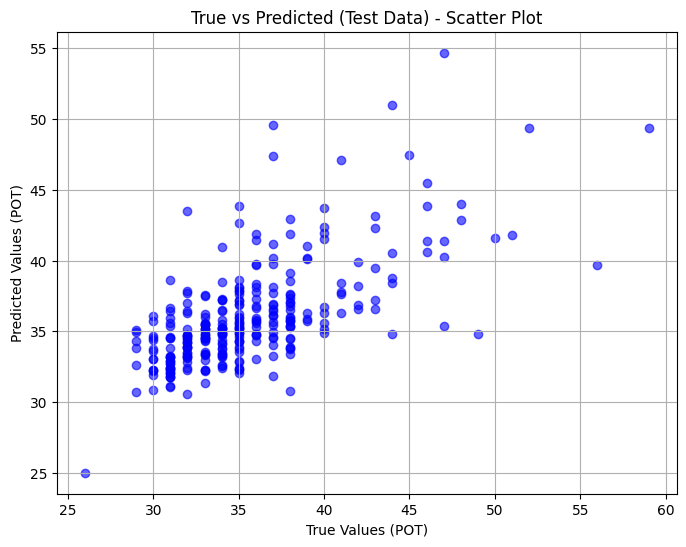

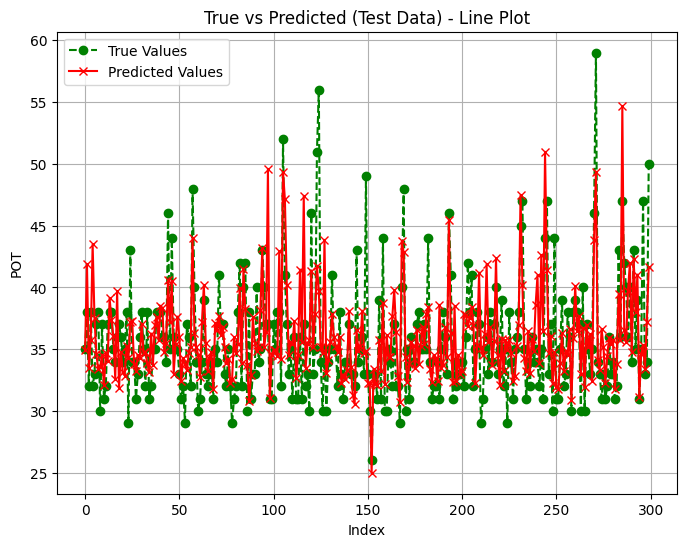

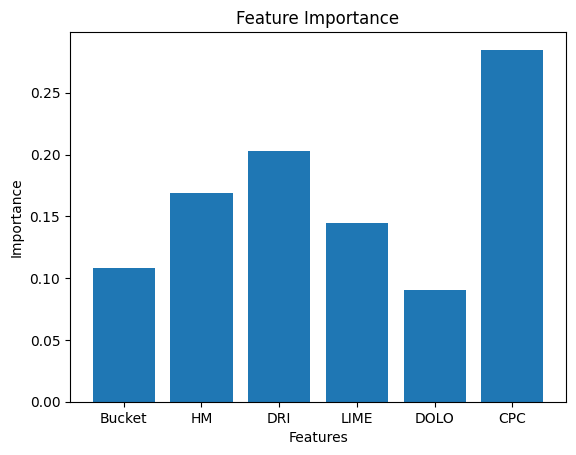

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC']]
y = df['POT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Train Data Metrics:")
print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Squared Error (Train): {mse_train}")
print(f"R² Score (Train): {r2_train}")

print("\nTest Data Metrics:")
print(f"Mean Absolute Error (Test): {mae_test}")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R² Score (Test): {r2_test}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Train Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_train.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_train_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Train Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Test Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Test Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

feature_importance = model.feature_importances_

plt.bar(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


Train Data Metrics:
Mean Absolute Error (Train): 8.354218880534788e-05
Mean Squared Error (Train): 2.1720969089391e-06
R² Score (Train): 0.9999999301274961

Test Data Metrics:
Mean Absolute Error (Test): 2.6517666666666666
Mean Squared Error (Test): 12.069414333333334
R² Score (Test): 0.46054759831963565


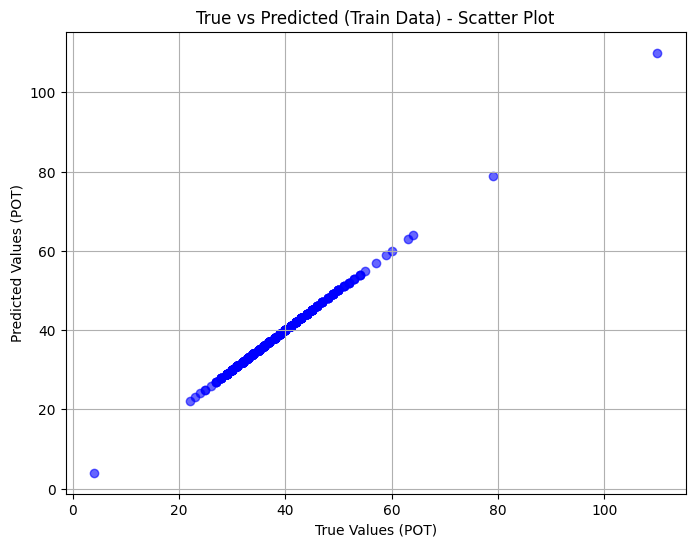

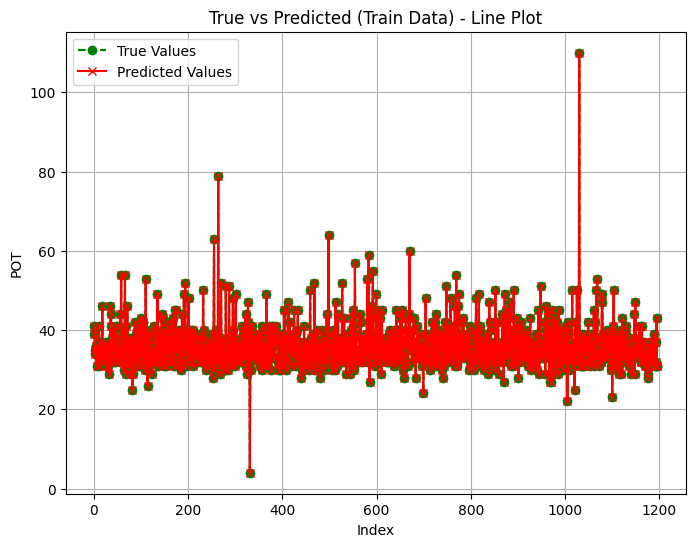

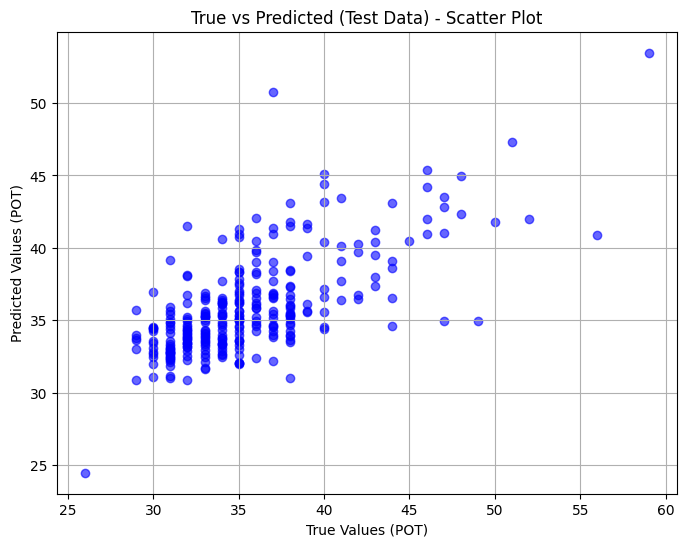

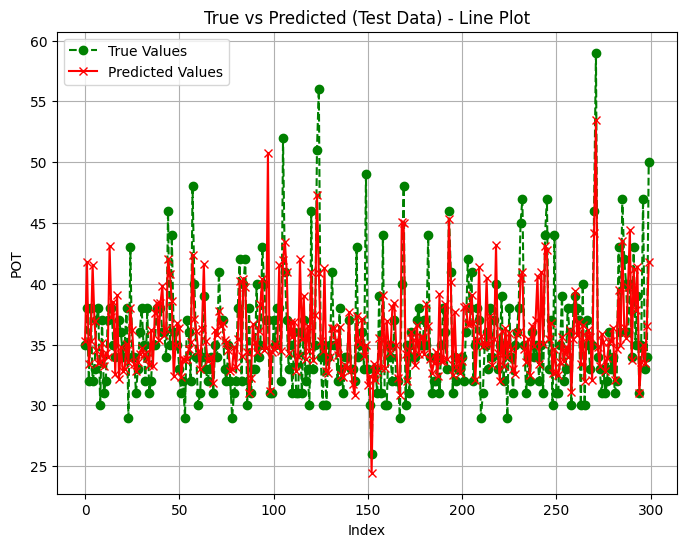

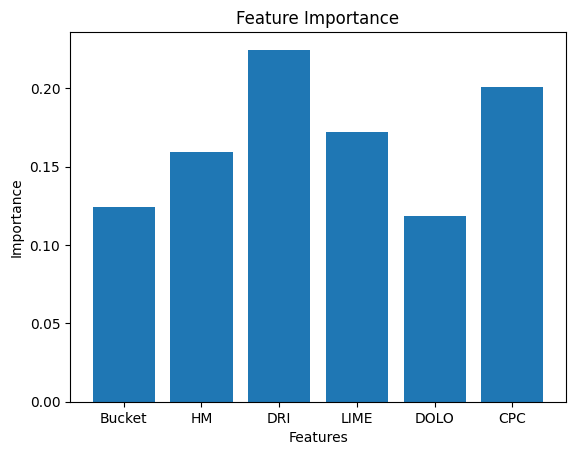

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC']]
y = df['POT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ExtraTreesRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Train Data Metrics:")
print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Squared Error (Train): {mse_train}")
print(f"R² Score (Train): {r2_train}")

print("\nTest Data Metrics:")
print(f"Mean Absolute Error (Test): {mae_test}")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R² Score (Test): {r2_test}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Train Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_train.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_train_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Train Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Test Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Test Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

feature_importance = model.feature_importances_

plt.bar(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


Train Data Metrics:
Mean Absolute Error (Train): 0.3360975252755403
Mean Squared Error (Train): 0.2445362907857706
R² Score (Train): 0.9921337013737715

Test Data Metrics:
Mean Absolute Error (Test): 2.8805282084147135
Mean Squared Error (Test): 15.536835223990492
R² Score (Test): 0.3055683693825946


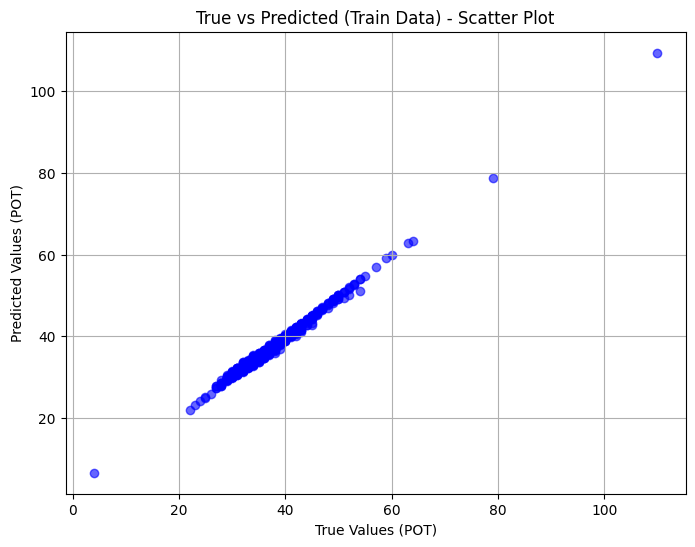

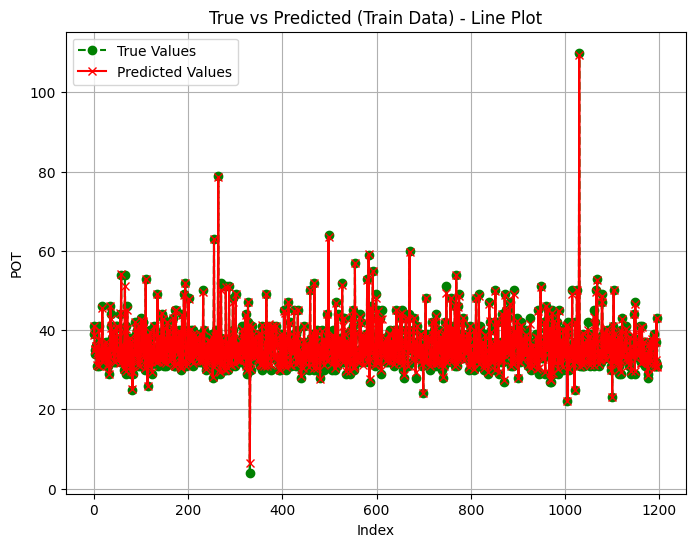

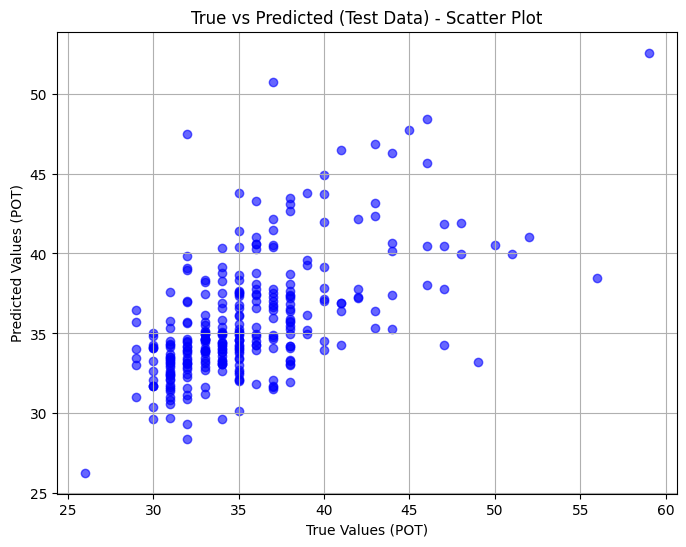

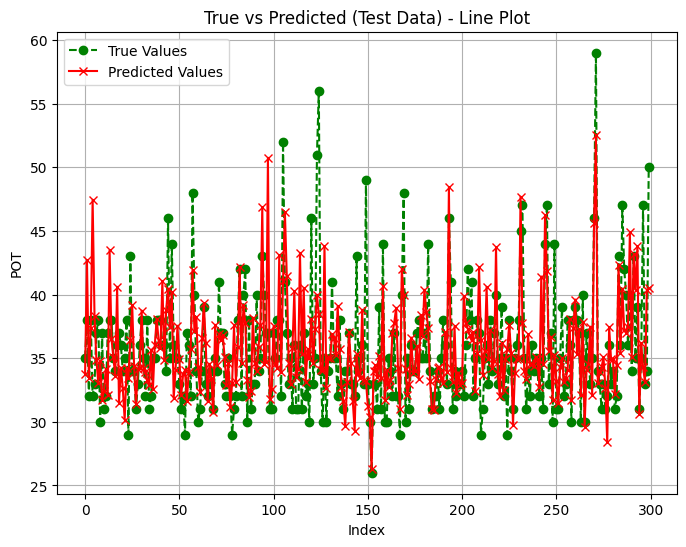

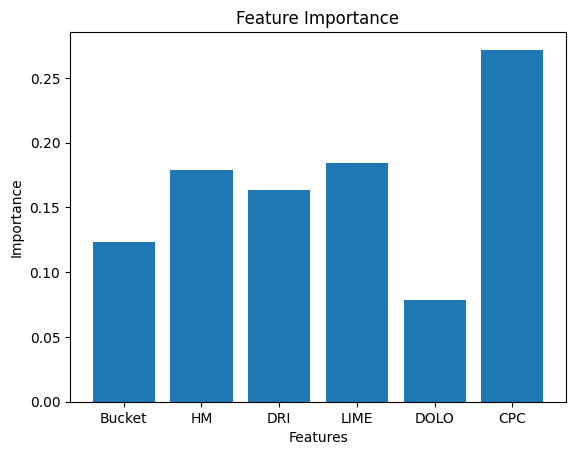

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

X = df[['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC']]
y = df['POT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = xgb.XGBRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

y_train_pred = model.predict(X_train_scaled)
y_pred = model.predict(X_test_scaled)

mae_train = mean_absolute_error(y_train, y_train_pred)
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

mae_test = mean_absolute_error(y_test, y_pred)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = r2_score(y_test, y_pred)

print("Train Data Metrics:")
print(f"Mean Absolute Error (Train): {mae_train}")
print(f"Mean Squared Error (Train): {mse_train}")
print(f"R² Score (Train): {r2_train}")

print("\nTest Data Metrics:")
print(f"Mean Absolute Error (Test): {mae_test}")
print(f"Mean Squared Error (Test): {mse_test}")
print(f"R² Score (Test): {r2_test}")

plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Train Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_train.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_train_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Train Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.6)
plt.title('True vs Predicted (Test Data) - Scatter Plot')
plt.xlabel('True Values (POT)')
plt.ylabel('Predicted Values (POT)')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(y_test.values, label='True Values', color='green', linestyle='--', marker='o')
plt.plot(y_pred, label='Predicted Values', color='red', linestyle='-', marker='x')
plt.title('True vs Predicted (Test Data) - Line Plot')
plt.xlabel('Index')
plt.ylabel('POT')
plt.legend()
plt.grid(True)
plt.show()

feature_importance = model.feature_importances_

plt.bar(X.columns, feature_importance)
plt.title("Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()


# Extra trees best model: SHAP plots for this model

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df[['Bucket', 'HM', 'DRI', 'LIME', 'DOLO', 'CPC']]
y = df['POT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = ExtraTreesRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

perm = PermutationImportance(model, random_state=42).fit(X_train_scaled, y_train)

eli5.show_weights(perm, feature_names=X.columns.tolist())


ModuleNotFoundError: No module named 'distutils'

In [19]:
df

,Bucket,HM,DRI,LIME,DOLO,CPC,OXY,POWER,AT,POT,GRADE,Total_weight
Unnamed: 0,,,,,,,,,,,,
4418506.0,24.80,50.39,47.30,9.5,2.0,1.339,3272.0,53604.0,47.0,49.0,S275HS,135.329
4418507.0,0.00,26.81,29.00,7.2,0.1,1.190,2265.0,20147.0,21.0,22.0,S275HS,64.300
4418508.0,44.07,45.01,36.60,8.3,1.2,0.695,2530.0,39060.0,38.0,39.0,JSPHTLS(V),135.875
4418509.0,34.00,53.28,46.20,11.4,1.7,0.646,3420.0,51563.0,51.0,51.0,JSPHTLS(V),147.226
4418511.0,31.00,66.37,30.70,7.4,1.1,0.571,3888.0,37173.0,37.0,37.0,JSPHTLS(V),137.141
...,...,...,...,...,...,...,...,...,...,...,...,...
4420125.0,0.00,60.34,65.50,9.6,2.1,0.714,3803.0,32165.0,33.0,35.0,SAE1010,138.254
4420126.0,20.53,65.09,38.80,10.2,1.6,0.671,3657.0,36688.0,38.0,38.0,EN8ACR,136.891
4420127.0,0.00,57.72,65.04,10.4,1.7,0.745,4217.0,32546.0,33.0,38.0,SAE1004,135.605


In [18]:
data

,Date,NH,Shift,Bucket,HM,DRI,LIME,DOLO,P.S,T C,CPC,POWER,OXY,POT,TTT,AT,T WT,GRADE
Unnamed: 0,,,,,,,,,,,,,,,,,,
4418506.0,2024-07-31,1.0,C1,24.80,50.39,47.30,9.5,2.0,0.0,122.49,1.339,53604.0,3272.0,49.0,120.0,47.0,104.0,S275HS
4418507.0,2024-07-31,2.0,C2,0.00,26.81,29.00,7.2,0.1,0.0,55.81,1.190,20147.0,2265.0,22.0,53.0,21.0,100.0,S275HS
4418508.0,2024-07-31,3.0,B1,44.07,45.01,36.60,8.3,1.2,0.0,125.68,0.695,39060.0,2530.0,39.0,NaN,38.0,NaN,JSPHTLS(V)
4418509.0,2024-07-31,4.0,B2,34.00,53.28,46.20,11.4,1.7,0.0,133.48,0.646,51563.0,3420.0,51.0,84.0,51.0,NaN,JSPHTLS(V)
4418510.0,2024-07-31,5.0,B3,29.47,71.99,NaN,NaN,NaN,NaN,101.46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JSPHTLS(V)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4420126.0,2024-09-24,7.0,C7,20.53,65.09,38.80,10.2,1.6,0.0,124.42,0.671,36688.0,3657.0,38.0,44.0,38.0,88.0,EN8ACR
4420127.0,2024-09-24,8.0,C8,0.00,57.72,65.04,10.4,1.7,0.0,122.76,0.745,32546.0,4217.0,38.0,42.0,33.0,100.0,SAE1004
4420128.0,2024-09-24,9.0,C9,25.50,60.75,37.10,9.1,1.9,0.0,123.35,0.522,32307.0,3623.0,32.0,38.0,32.0,88.0,EN8ACR
